# PROBLEM STATEMENT

** House Price Predictions**







---

* Dataset includes house sale prices for King County in USA. 
* Homes that are sold in the time period: May, 2014 and May, 2015.
* Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction
* Columns:

> 1. ida: notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/House
6. sqft_living: square footage of the home
7. sqft_lot: square footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. grade: overall grade given to the housing unit, based on King County grading system
13. sqft_abovesquare: footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) 
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)




---








# STEP #0: IMPORT LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STEP #1: IMPORT DATASETS

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/My Drive/Data/kc_house_data.csv')

In [4]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# STEP #2: VISUALIZE DATASET

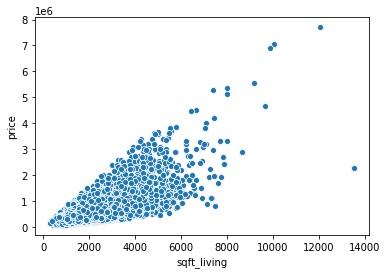

In [7]:
sns.scatterplot(x='sqft_living', y = 'price' , data=df)

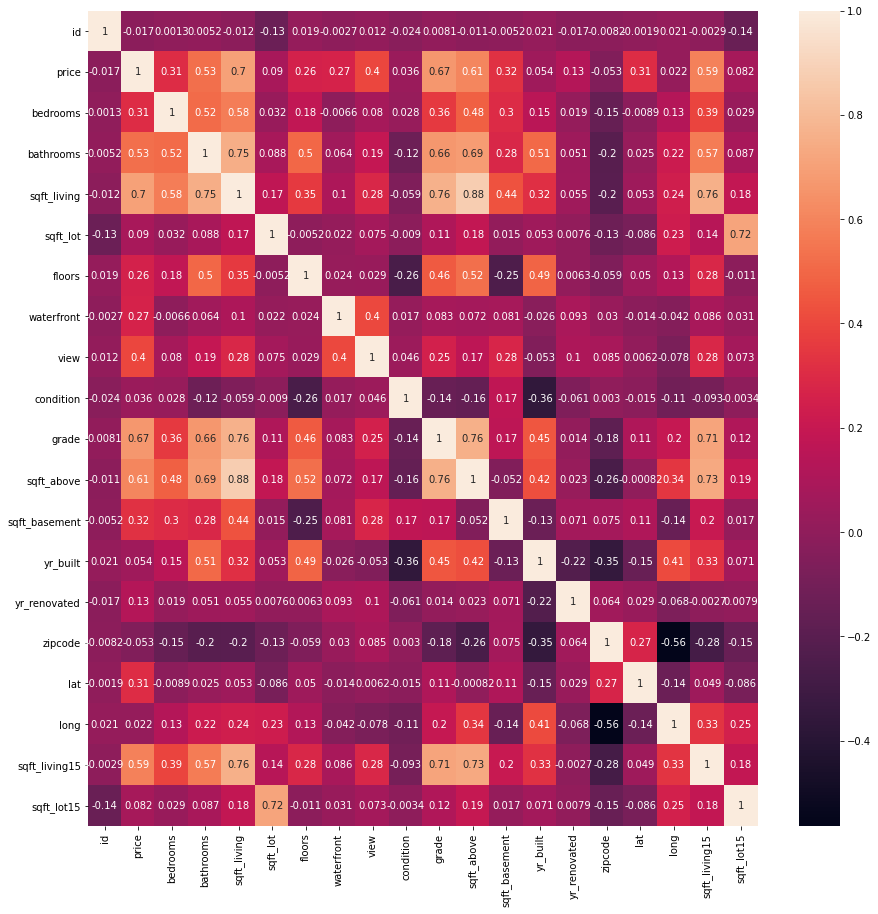

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91667a8f60>,
      dtype=object)

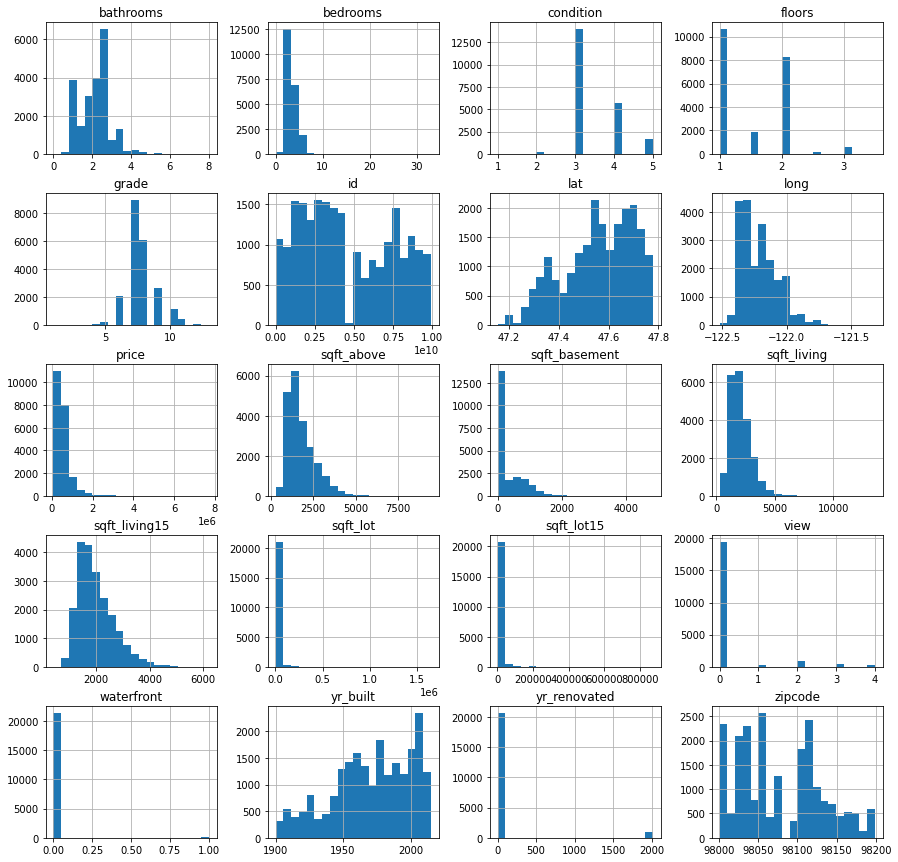

In [13]:
df.hist(bins=20, figsize=(15,15))

In [14]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x7f91c0849840> (for post_execute):


KeyboardInterrupt: ignored

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [15]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [24]:
X= df[selected_features]
y=df['price']

In [17]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [18]:
X.shape

(21613, 7)

In [19]:
y.shape

(21613,)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [26]:
y =y.values.reshape(-1,1)
y= scaler.fit_transform(y)

# STEP#4: TRAINING THE MODEL

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [32]:
X_train.shape

(16209, 7)

In [31]:
X_test.shape

(5404, 7)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(7,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [37]:
epochs_hist= model.fit(X_train,y_train,epochs=100,batch_size=50,validation_data=(X_test,y_test) )

Epoch 1/100
325/325 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 2/100
325/325 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
325/325 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
325/325 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/100
325/325 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/100
325/325 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.9342e-04
Epoch 7/100
325/325 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.9523e-04
Epoch 8/100
325/325 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.9729e-04
Epoch 9/100
325/325 [==============================] - 1s 2ms/step - loss: 9.9586e-04 - val_loss: 9.9640e-04
Epoch 10/100
325/325 [==============================] - 1s 2ms/step - l

# STEP#5: EVALUATING THE MODEL 

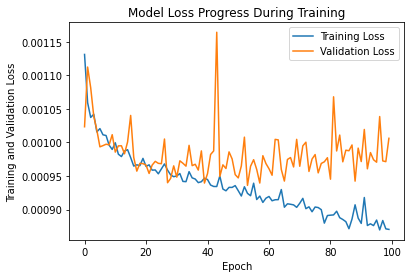

In [39]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

array([[227310.61]], dtype=float32)

Text(0, 0.5, 'True Values')

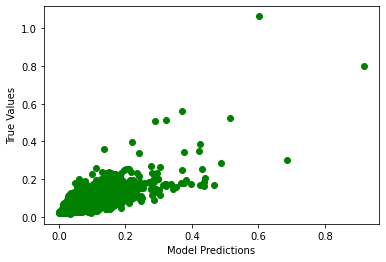

In [40]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "o", color = 'g')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [42]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

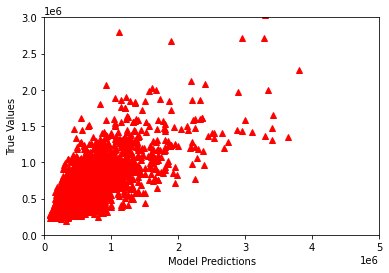

In [43]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

5404

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 241859.542 
MSE = 58496038139.44764 
MAE = 156591.6220854922 
R2 = 0.5822681874285334 
Adjusted R2 = 0.5817262818154866


# LET'S INCREASE THE NUMBER OF FEATURES (INDEPENDANT VARIABLES) AND RETRAIN THE EXACT SAME MODEL

In [47]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[selected_features]

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [51]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

(16209, 1)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(19,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [56]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50,validation_data=(X_test,y_test))


Epoch 1/100
325/325 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 6.3695e-04
Epoch 2/100
325/325 [==============================] - 1s 2ms/step - loss: 5.4591e-04 - val_loss: 8.3783e-04
Epoch 3/100
325/325 [==============================] - 1s 2ms/step - loss: 4.7550e-04 - val_loss: 4.6677e-04
Epoch 4/100
325/325 [==============================] - 1s 2ms/step - loss: 4.5186e-04 - val_loss: 4.6967e-04
Epoch 5/100
325/325 [==============================] - 1s 2ms/step - loss: 4.0285e-04 - val_loss: 3.7582e-04
Epoch 6/100
325/325 [==============================] - 1s 2ms/step - loss: 3.9026e-04 - val_loss: 3.9744e-04
Epoch 7/100
325/325 [==============================] - 1s 2ms/step - loss: 3.8963e-04 - val_loss: 4.3279e-04
Epoch 8/100
325/325 [==============================] - 1s 2ms/step - loss: 3.6387e-04 - val_loss: 3.4693e-04
Epoch 9/100
325/325 [==============================] - 1s 2ms/step - loss: 3.4935e-04 - val_loss: 3.8653e-04
Epoch 10/100
325/325 [=

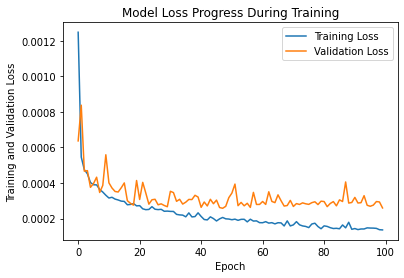

In [57]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

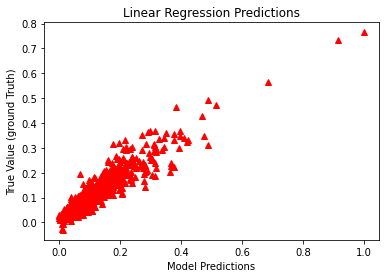

In [58]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [63]:
y = scaler.fit_transform(df['price'].values.reshape(-1,1))
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [64]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 122929.07 
MSE = 15111556361.377607 
MAE = 71596.34080513277 
R2 = 0.8994232409018739 
Adjusted R2 = 0.8990683080595885


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS